<a href="https://colab.research.google.com/github/javlonravshanov/transport_classification_final/blob/main/portfolio_road_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Road Sign Classification Using Deep Learning


## Introduction
This notebook demonstrates the development of a deep learning model for classifying road signs in Poland. The dataset includes 32,000 images of 46 different types of road signs. The model achieved an accuracy of 99.7%.


## Data Preparation
### Data Overview
Initially, I explored various datasets and found the "German Traffic Sign Recognition Benchmark" on Kaggle. However, this dataset did not fully meet my specific needs. To address this, I created a custom dataset tailored to my requirements. I manually collected images and subsequently organized and renamed them using the "Bulk Rename Utility" software. The final dataset comprises approximately 32,000 images across 46 distinct classes.


### Data uploading
Once my dataset was prepared, I compressed it into a .zip file and uploaded it to Google Drive for easier access and management. This approach ensures that I won't need to re-upload the dataset in the future. Instead, I can simply mount Google Drive in Google Colab to access the dataset directly.

In [ ]:
import gdown

file_id = '1odW7NTn-3LrwxagBy9w4Xb8EZDVdBFG7'
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="dataset.zip", quiet=False)

!unzip /content/dataset.zip -d /content/dataset

Downloading...
From (original): https://drive.google.com/uc?id=1odW7NTn-3LrwxagBy9w4Xb8EZDVdBFG7
From (redirected): https://drive.google.com/uc?id=1odW7NTn-3LrwxagBy9w4Xb8EZDVdBFG7&confirm=t&uuid=6722053b-0dc2-4814-ab95-d98f06d26773
To: /content/dataset.zip
100%|██████████| 318M/318M [00:10<00:00, 31.6MB/s]


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0863.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0864.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0865.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0866.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0867.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0868.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0869.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0870.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0871.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0872.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0873.png  
  inflating: /content/dataset/road_sign_dataset/roadworks_area/36_0874.png  
  inflating: /content/dat

### Tools
For developing my image classification model, I chose the Fastai library due to its powerful features and ease of use. Fastai, built on top of PyTorch, offers an intuitive high-level API that streamlines the training process. Its comprehensive tools for data augmentation, pre-built models, and transfer learning make it ideal for efficiently handling complex datasets. Additionally, I utilized Google Colab to leverage its cloud-based resources and facilitate seamless model training and experimentation.

In [ ]:
# Importing necessary libraries
from fastai.vision.all import *
import torch

In [ ]:
# path to dataset
path = Path('/content/dataset')

In [ ]:
# creating datablocks and dataloaders
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   splitter = RandomSplitter(valid_pct=0.2, seed=42),
                   get_y = parent_label,
                   item_tfms = Resize(224),
                   batch_tfms = aug_transforms())

dls = dblock.dataloaders(path)

The code above defines a `DataBlock` in Fastai to manage the process of loading and preprocessing a dataset for image classification. It specifies that the dataset consists of images and their corresponding categories, using `ImageBlock` and `CategoryBlock`. The images are collected using the get_image_files function, and then split into training and validation sets with an `80-20` ratio (`RandomSplitter`). Labels are assigned based on the parent folder names (`parent_label`).

The code then applies a series of transformations to the data. Individual images are resized to 460 pixels (`Resize`(460)), and a set of batch transformations including data augmentation (`aug_transforms`) is applied with a target size of `224` pixels. Finally, the `dataloaders` method is used to create `DataLoaders`, which efficiently manage the data pipeline for training and validation.

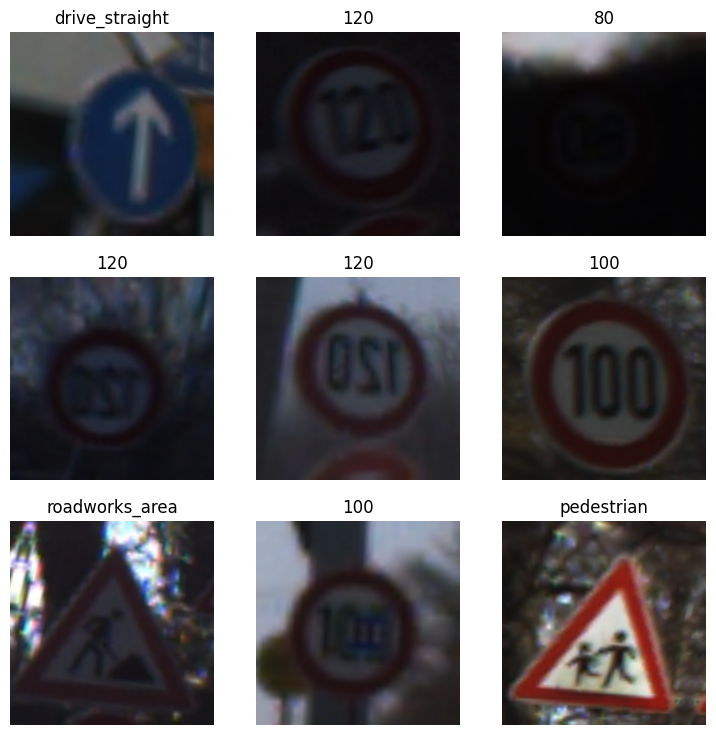

In [ ]:
dls.show_batch()

`dls.show_batch()` is a Fastai function that displays a grid of images and labels from the data loaders. It helps verify that all data transformations and augmentations are applied correctly, ensuring the dataset is ready for training.

## Model Architecture
### Model Creation and Training
Create and train the model using Fastai's high-level API.


In [ ]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 105MB/s]


`learn`: The variable where the model is stored.

`cnn_learner`: A Fastai function that creates a convolutional neural network (CNN) for image classification.

`dls`: The data loaders, which supply the training and validation data to the model.

`resnet34`: The specific architecture of the CNN being used, known for its good performance on image recognition tasks.

`metrics=accuracy`: Specifies that the model should use accuracy as the measure of how well it’s performing

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


SuggestedLRs(valley=0.0014454397605732083)

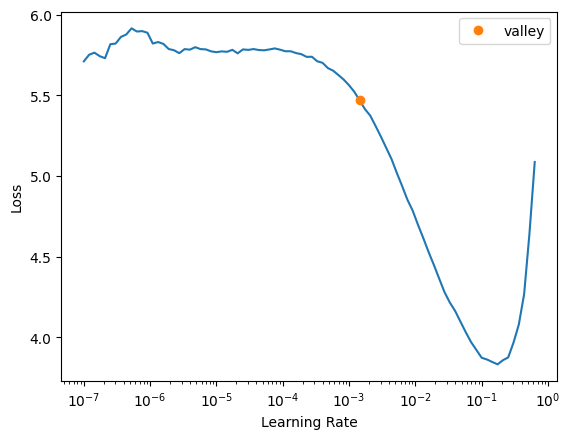

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.650038,0.321230,0.895126,02:21


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.166063,0.084252,0.971541,02:47
1,0.107697,0.066635,0.979403,02:46
2,0.046326,0.043417,0.986950,02:47
3,0.014747,0.012192,0.996698,02:46
4,0.006039,0.010048,0.997642,02:48


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

## Evaluation
### Performance Metrics


### Confusion Matrix and Classification Report
I evaluated the model's performance using a confusion matrix, which helps visualize how well the model is classifying each category by showing the true versus predicted labels.



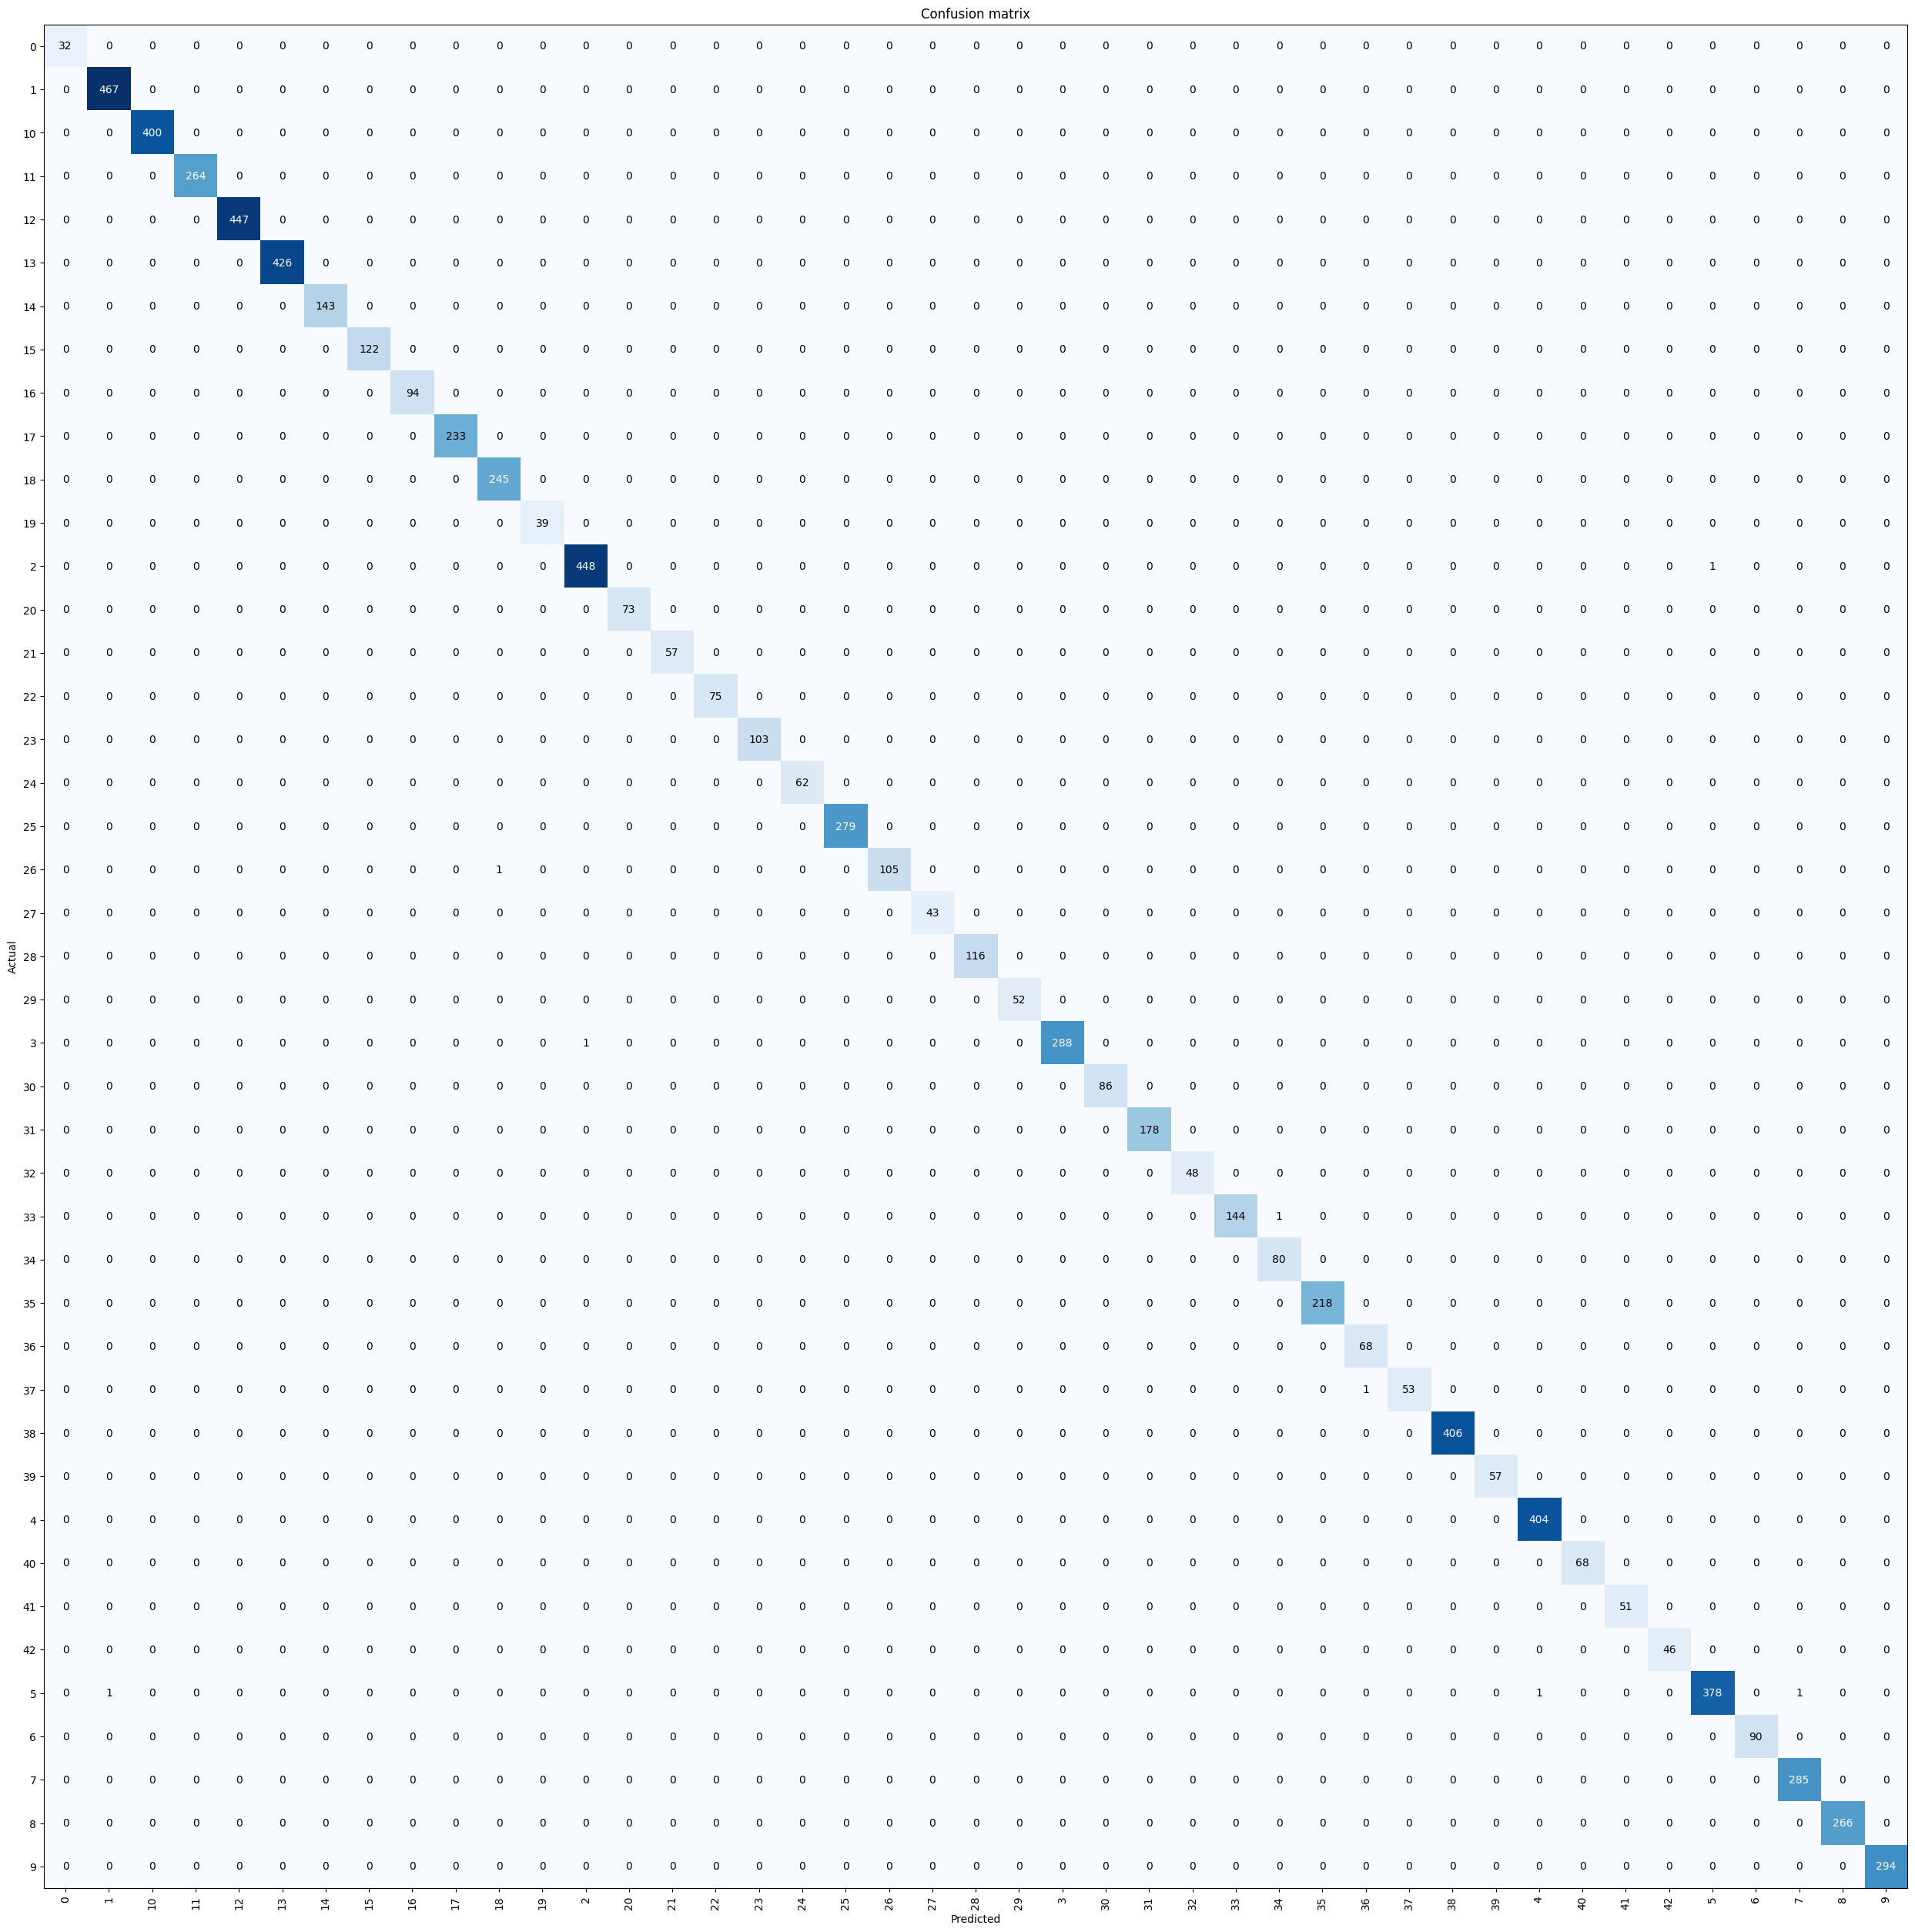

## Results
### Sample Predictions

In [ ]:
# testing with sample image using widgets
from ipywidgets import widgets
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

stop
Probability: 99.98%


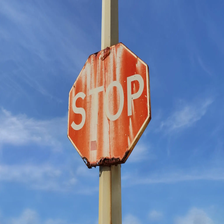

In [ ]:
#saving the model
# learn.export('road_sign_model.pkl')
# model = load_learner('/content/drive/MyDrive/Datasets/Road_signs_dataset/road_sign_model (1).pkl')



img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(pred)
pred_index = learn.dls.vocab.o2i[str(pred)]

predicted_class_prob = prob[pred_index].item() * 100
print(f'Probability: {predicted_class_prob:.2f}%')
fixed_size = (224, 224)
resized_img = img.resize(fixed_size, Image.LANCZOS)
resized_img